<a href="https://colab.research.google.com/github/Dh-arch1923/My-Work/blob/main/Support_Vector_Machine(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

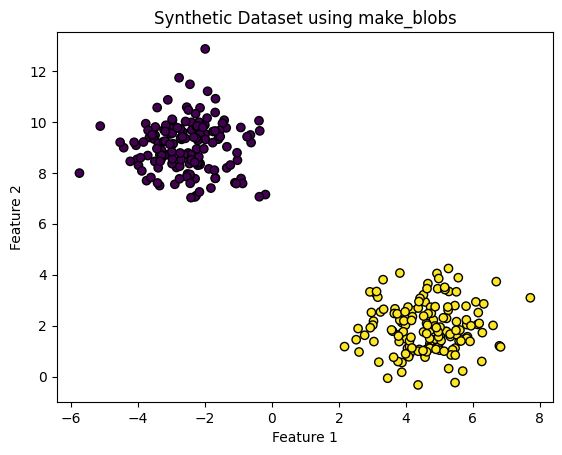

In [65]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)

# Scatter plot of the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset using make_blobs")
plt.show()


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [7]:
df=pd.read_csv('/content/diabetes.csv')
df[0:4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [42]:
#Create a dependent and independent variable
x=df.iloc[:,:8]
y=df.iloc[:,8]

In [43]:
scler=StandardScaler()
X=scler.fit_transform(x)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [44]:
#Split the data for train and test
X_test,X_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((154, 8), (154,), (614, 8), (614,))

In [59]:
#Before train it into model try with samples to get the correct value of the kernal,gammma,degree of tolerance
svv=SVC()
test_parameters=[{'kernel':['rbf','sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                  'C':[14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001]}]
abc=GridSearchCV(svv,test_parameters)
abc.fit(x,y)


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1,
                                0.1, 0.001],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                          'kernel': ['rbf', 'sigmoid']}])

In [60]:
abc.best_params_ , abc.best_score_

({'C': 14, 'gamma': 0.1, 'kernel': 'rbf'}, 0.6510482981071216)

accuracy score 0.6400651465798045
[[393   0]
 [221   0]]


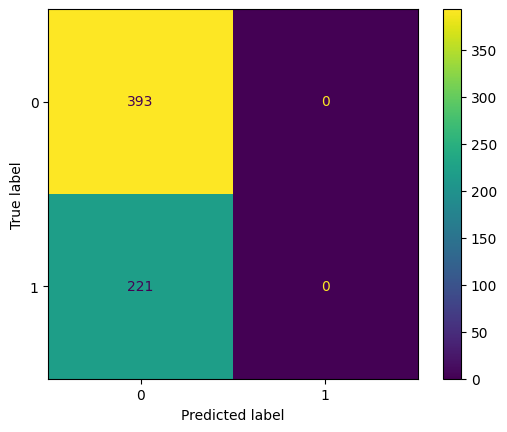

In [61]:
svc=SVC(kernel='rbf',C=14,gamma=0.1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy score',accuracy)
print(confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
